# CS437 LAB4 Part 1

### Objectives:
Use radar to detect object and motion in 1D, know how to use range profile to detect objects and motion


### Components needed:
TI radar, laptop with usb port, corner reflectors (ask TAs about corner reflectors during the lab) <br>
*note: you will not be using raspberry pi for this lab<br>
*note: open this file in Jupiter notebook to directly run the code.

### Background
Welcome to the world of FMCW radar technology! In this lab, we will delve into the fundamental concepts and principles behind Frequency Modulated Continuous Wave (FMCW) radar systems. Radar technology plays a pivotal role in various applications, including weather monitoring, navigation, surveillance, and target detection. FMCW radar, in particular, has gained significant attention due to its ability to provide accurate range and velocity measurements simultaneously, making it an indispensable tool in modern engineering and scientific research.

At the heart of radar technology lies the principle of sending electromagnetic waves and measuring the time it takes for these waves to travel to a target and back. Traditionally, radar systems utilized pulsed signals, where short bursts of high-frequency waves were transmitted, and the time delay of the reflected signal was used to determine the distance to the target. FMCW radar, however, operates differently. Instead of using pulsed signals, FMCW radar works by continuously emitting a signal with a frequency that varies linearly over time. When this modulated signal encounters a target, a portion of it is reflected back to the radar receiver. The radar receiver captures these reflected signals, and by analyzing the time delay, or frequency shift, between the transmitted and received signals, the radar system calculates the distance to the reflecting objects.

<img src=image1.jpeg>

In this lab, we will be working with the IWRL6432 radar device. The radar device will combine the transmitted and received signals, generating the Intermediate Frequency (IF) signal. The IF signal is essentially the "beat frequency" resulting from the mixing of the transmitted signal's frequency and the received signal's frequency. The beat frequency is crucial because it directly relates to the range of detected objects. By analyzing this IF frequency, we can determine the distance between the radar and the reflecting objects.

In this lab, we will focus on interpreting the FFT of the IF signal, which is called the "range profile", a key component in FMCW radar processing.


<img src=image2.jpg>

## Excercise 1: Range Profile Processing

In this section, you will use provided Visualizer to view and record the range profile and we will then save the data for extra processing <br>
Open Visualizer (same as what you've done in prelab), and check "save UART" option.<br>
This will save all the information streamed from radar device.

Next, put the radar port number under COM port section and select and send the "lab4.cfg" configuration file included in this folder. (as shown in the image below)

Clicking "range" option on the top of the plot will show you the range profile in real time.
Put corner reflector in front of the radar and try moving it to see how range profile changes in real time.

Visualizer will save the data streamed from radar in every 100 frames.
Ensure you have recorded more than 100 frames, and quit the Visualizer.

You should see the binary file saved under the same directory as the Visualizer.

<img src=image3.png>

## Parsing binary file and plotting object's motion
To parse the binary file output from radar captured through the visualizer, run the following code, which calls parse_bin_output.py to read and process the binary output files.

The output file is numpy array of dictionaries, where each dictionary represent the key information of each frame

In [1]:
# import required libraries
import struct
import sys
import serial
import binascii
import time
import numpy as np
import math

import os
import datetime
import matplotlib.pyplot as plt

# Local File Imports
from parse_bin_output import *

# specify the binary file path below
binFilePath = "../prelab4/Industrial_Visualizer/binData/11_02_2023_14_15_11/"
output_dict = parse_ADC(binFilePath)
print(f"\neach frame dict contains following informations: {output_dict[0].keys()}")

processing file: ../prelab4/Industrial_Visualizer/binData/11_02_2023_14_15_11/pHistBytes_1.bin

each frame dict contains following informations: dict_keys(['targetFrameNum', 'header', 'bytes', 'numDetectedPoints', 'pointCloud', 'rangeProfile'])


Next, we will plot the range profile of the first frame. This information is sent from the radar, which is included in the parsed output data.
* Note: if you don't see range profile, that means radar didn't detect any object.

Keep in mind that the range profile is essentially the output of FFT and shows IF signals. We first need to calculate what distance each frequency bin represents.

To do so, we first need to calculate d_max (the maximum detectable distance). Then the distance between every two frequency bin equals d_max/nFFT, where nFFT is the number of FFT bins.

Use the d_max equation from the slides and complete the code snippet below to plot the saved range profile with x axes shown the distances and y axes showing the amplitude at each frequency.



[ 0.          0.83705357  1.67410714  2.51116071  3.34821429  4.18526786
  5.02232143  5.859375    6.69642857  7.53348214  8.37053571  9.20758929
 10.04464286 10.88169643 11.71875    12.55580357 13.39285714 14.22991071
 15.06696429 15.90401786 16.74107143 17.578125   18.41517857 19.25223214
 20.08928571 20.92633929 21.76339286 22.60044643 23.4375     24.27455357
 25.11160714 25.94866071 26.78571429 27.62276786 28.45982143 29.296875
 30.13392857 30.97098214 31.80803571 32.64508929 33.48214286 34.31919643
 35.15625    35.99330357 36.83035714 37.66741071 38.50446429 39.34151786
 40.17857143 41.015625   41.85267857 42.68973214 43.52678571 44.36383929
 45.20089286 46.03794643 46.875      47.71205357 48.54910714 49.38616071
 50.22321429 51.06026786 51.89732143 52.734375  ]
[6234, 4218, 2760, 2635, 3178, 50412, 184154, 226749, 120048, 43086, 26907, 14488, 6812, 7477, 6645, 7776, 6141, 7655, 10852, 7146, 3707, 3696, 4504, 3364, 3472, 4252, 5284, 4028, 2546, 2566, 2974, 2515, 2060, 2063, 2615, 

Text(0.5, 1.0, 'range profile: frame0')

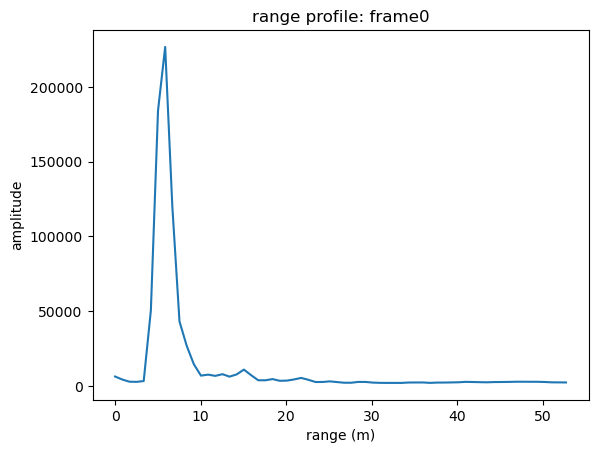

In [2]:
frame_num = 0
range_profile = output_dict[frame_num]['rangeProfile']

#plotting range profile

# define parameters to determine the range:
nFFT = len(range_profile)     # number of FFT bins
fs = 100e6 / 8                  # sampling frequency
c0 = 3e8                        # speed of light
S = 35e12                      # slope of chirp signal

# ---- to be completed ----
dmax = fs*c0/(2*S)
#maximum unambiguous distance, detectable by the radar
delta_d = dmax/nFFT
 #distance between every two frequency bin
# ----to be completed ----

# vRange represents the distance vector that will be shown in the x axes of the plot before
vRange = np.arange(nFFT) * delta_d
vRange = vRange[:len(range_profile)]
print(vRange)
print(range_profile)
plt.plot(vRange, range_profile)
plt.xlabel('range (m)')
plt.ylabel('amplitude')
plt.title(f'range profile: frame{frame_num}')

### Checkpoint 1 (3 points):

complete the function below to plot the range profile over time, create a known motion with a corner reflector in front of the radar and demonstrate the reflection distance changing over time with the distance to the object shown correctly. Show the result to TA and explain your trajectory.

hint: use stacked heatmap for visualizing range profile over time.



[[   6234    5764    6305 ... 1145613  162686   52199]
 [   4218    4285    4769 ... 2197463  951868   53545]
 [   2760    2658    2716 ... 1903890 1855904  465857]
 ...
 [   2321    2351    2470 ...   89000   22159   19294]
 [   2293    2251    2314 ...   80354   21046   17167]
 [   2246    2261    2245 ...   74204   18475   15651]]


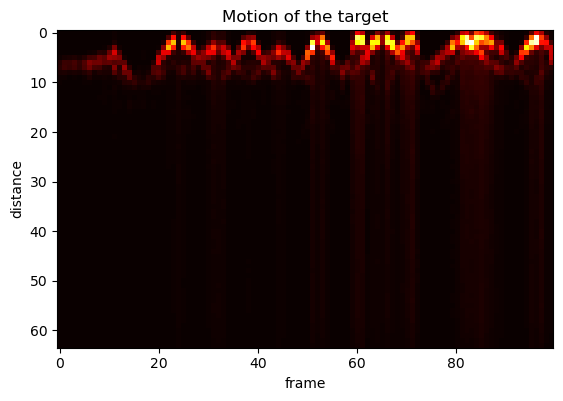

In [3]:
def plot_motion(output_dict):
    # plot a plot showing frame as x axis and distance as y axis, showing motion of the target
    # ---- to be completed ----
    frame_num = []
    distance = None
    # Stack range profiles for each frame into a 2-d matrix
    for frame in output_dict:
        frame_num.append(frame['targetFrameNum'])
        range_profile = frame['rangeProfile']
        nFFT = len(range_profile)     # number of FFT bins
        fs = 100e6 / 8                  # sampling frequency
        c0 = 3e8                        # speed of light
        S = 35e12                      # slope of chirp signal
        dmax = fs*c0/(2*S)
        delta_d = dmax/nFFT
        vRange = np.arange(nFFT) * delta_d
        vRange = vRange[:len(range_profile)]
        distance = np.vstack((distance, range_profile)) if distance is not None else range_profile

    distance = distance.T
    print(distance)
    
    # Plot the 2-d matrix distance as a heatmap, with each column in distance as a frame
    # The plot has frame number in x and distance in y
    plt.figure()
    plt.imshow(distance, cmap='hot', interpolation='nearest')
    plt.xlabel('frame')
    plt.ylabel('distance')
    plt.title('Motion of the target')
    plt.show()
    

plot_motion(output_dict)

## Exercise 2: Tuning radar parameters

with current radar setup, we cannot distinguish two close objects from range profile. This is because our range resolution is too low to distinguish two objects.

reminder: radar range resolution is defined as $\frac{C}{2B}$, where $C$ is speed of light and $B$ is bandwitdth of chirp

You can tune the radar parameters (e.g. bandwidth, chirp duration, slope, etc) from the configuration file sent to radar.<br>
Each line of configuration file represents a CLI message that configures several parameters of the radar.
Some major commands and parameters are listed below:

##### <b>channelCfg 7 3 0</b>
| parameter | explanation | Description |
| --- | :-- | :-- |
| rxChCtrlBitMask | To enable (as an example): <br> - RX antennas 1 and 2, mask = 0x011b = 3 <br>- RX antennas 1 and 3, mask = 0x101b = 5 <br>- RX antennas 2 and 3, mask = 0x110b = 6 <br>- RX antennas 1, 2 & 3, mask = 0x111b = 7 | Set to 7 to enable all available RX antennas. |
| txChCtrlBitMask | To enable: <br>- TX antennas 1 and 2, mask = 0x011b = 3 <br>- TX antenna 1, mask = 0x001b = 1 <br>- TX antenna 2, mask = 0x010b = 2 | Set to 3 to enable all available TX antennas. |
| miscCtrl | set to 0 | not supported |

##### <b>chirpComnCfg 8 0 0 128 4 28 0</b>
| parameter | type | value | Description |
| --- | --- | --- | :-- |
| digOutputSampRate | int | 8 | Sampling rate decimator. The digital sampling rate is given by 100MHz/digOutputSampRate. <br>Valid Range: 8 to 100. |
| digOutputBitsSel | int | 0 | Digital output sample bits select. |
| dfeFirSel | int | 0 | The final stage FIR filter's characteristics.|
| numOfAdcSamples | int | 128 | Number of ADC samples collected during the ADC sampling time. <br> Current SDK works for values with powers of 2. <br>Valid Range: 2 to 2048. |
| chirpTxMimoPatSel | int |4|Configure BPM/TDM mode. If 1 TX is enabled: <br>-Set to 0 to disable the multiplexing mode.<br>If 2 TX is enabled:<br>-Set to 1 to enable TDM mode <br>-Set to 4 to enable BPM mode.<br>Suggested to set 4. |
|chirpRampEndTime|float|28|Ramp end time in μs.|
|chirpRxHpfSel|int|0|Chirp profile HPF corner frequency.|


##### <b>chirpTimingCfg 6 63 0 35 60</b>
| parameter | type | value | Description |
| --- | --- | --- | :-- |
|chirpIdleTime|float|6|Idle time in μs.|
|chirpAdcSkipSamples|int|63|Number of samples skipped during ADC sampling. <br>The ADC start time in μs is computed based on the sampling rate. <br>Valid range: 0 to 63.
|chirpTxStartTime|float|0|TX start time in μs.<br>Recommended Range: +/- 5μs.|
|chirpRfFreqSlope|float|35|Frequency slope in MHz/μs.<br>Valid range: - 399MHz/μs to +399MHz/μs.|
|chirpRfFreqStart|float|60|Chirp profile RF start frequency in GHz.<br>Valid range: 58GHz to 62.5GHz for ES1.0 devices.|


##### <b>frameCfg 2 0 200 64 250 0</b>
| parameter | type | value | Description |
| --- | --- | --- | :-- |
|numOfChirpsInBurst|int|2|Number of chirps in a burst.<br>Valid Range: 1 to 65535 chirps.|
|numOfChirpsAccum|int|0|Number of accumulations per chirp.<br>0: Chirp accumulation feature is disabled.<br>2 – 64: Chirp accumulation feature is enabled.|
| burstPeriodicity|float|200|Burst periodicity in μs.|
|numOfBurstsInFrame|int|64|Number of bursts per frame.<br>Valid range: 1 to 4096.|
|framePeriodicity|float|250|Frame periodicity (i.e., the time gap between successive frame starts) in ms.|
| numOfFrames|int|0|Number of total frames. 0: Infinite frames,<br>value > 0: Finite frames.<br>Valid Range: 0 to 65535.<br>Always set to 0 to run the demo in continuous mode (i.e., to generate endless frames).|

For more detailed description, please review the radar documentation attached in the lab folder.

Cheatsheet:
sampling_rate = 100MHz/digOutputSampleRate <br>
num_adc = numOfAdcSamples <br>
chirp_duration = sampling_rate*num_adc<br>
slope = chirpRfFreqSlope<br>
BandWidth = chirp_duration*slope<br>

### Checkpoint 2 (2 points):
Calculate the current range resolution and modify the configuration file we send to radar to increase the range resolution of the radar such that you can distinguish the reflections from two corner reflectors as you move them in front of the radar. Call one of the TAs and show your plots before and after modifying the configuration file. <br>
(hint: with fixed chirp duration change the frequency slope will change the bandwidth!)

## Extra Credit Checkpoint (2 points): Dealing with Radar Interference

Since radars actively transmit signals for sensing, when two or more radars are in the field of view of each other, interference could happen that masks their sensing ability. This interference will show up as "ghost points" in point cloud data and/or range profile.

- Pair up with a neighboring group and start the visualizer with two radars facing each other. Characterize the conditions for seeing the interferene (at what angles, what distance between the two radars,e tc) and discuss within your groups how this is avoided in automotive collision radars specially in two-way roads with no median!?

- Call over a TA and show how interference can cause noise, by comparing the case where there is a interference and without interference. Be ready to answer the above question.